In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from imblearn.datasets import fetch_datasets

In [3]:
mammography = fetch_datasets()['mammography']

In [10]:
X = pd.DataFrame(mammography['data'])

In [11]:
y = pd.DataFrame(mammography['target'])

In [6]:
X.shape

(11183, 6)

In [8]:
y.shape

(11183,)

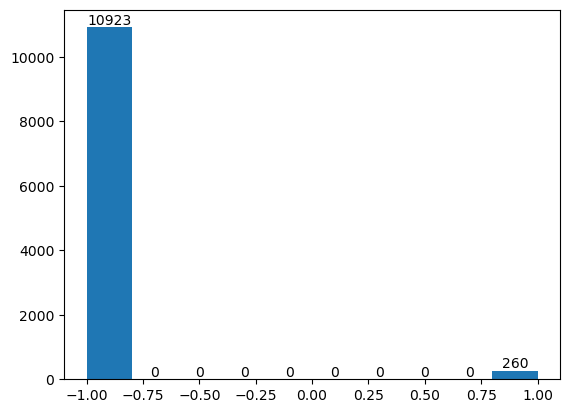

In [9]:
edges, lines, bins = plt.hist(y)
plt.bar_label(bins)
plt.show()

In [12]:
X.describe()

,0,1,2,3,4,5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096535e-10,1.297595e-09,5.698113e-10,-2.435705e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [16]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [17]:
def report(model, x, y, text='training'):
    y_pred = model.predict(x) 
    
    print(f'{text}\t | \t {type(model).__name__}')
    print('-'*80)
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print('-'*80)
    print(pd.DataFrame(confusion_matrix(y, y_pred), index=['B', 'M'], columns=['B', 'M']))

In [18]:
# Klasican nacin rada

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model_dct = DecisionTreeClassifier(max_depth=6, min_samples_split=50, criterion='gini')

In [21]:
model_dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50)

In [23]:
report(model_dct, X_train, y_train)

training	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.63      0.99      0.79      0.65      8192
          1       0.85      0.63      1.00      0.72      0.79      0.61       195

avg / total       0.99      0.99      0.64      0.99      0.79      0.65      8387

--------------------------------------------------------------------------------
      B    M
B  8170   22
M    72  123


In [24]:
report(model_dct, X_test, y_test, 'testing')

testing	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.52      0.99      0.72      0.55      2731
          1       0.72      0.52      1.00      0.61      0.72      0.50        65

avg / total       0.98      0.98      0.53      0.98      0.72      0.54      2796

--------------------------------------------------------------------------------
      B   M
B  2718  13
M    31  34


In [25]:
def resample(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    
    return X_resampled, y_resampled

In [26]:
from sklearn.decomposition import PCA

In [27]:
def visualize(X, X_resampled, Y, Y_resampled, x_opacity=0.5):
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled)
    
    X_stacked = [X_pca, X_resampled_pca]
    Y_stacked = [Y, Y_resampled]
    
    fig = plt.figure(figsize=(20,5))
    
    for i in range(2):
        ax = plt.subplot(1,2,i+1)
        colors = ['b' if y == -1 else 'r' for y in Y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:,0], X_stacked[i][:,1], c=colors, alpha=alpha)
        plt.title(f'{"After" if i else "Before"}', c='blue' if i else 'green')
    plt.show()

In [28]:
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    model = DecisionTreeClassifier(max_depth=7, min_samples_split=25, criterion='gini')
    model.fit(X_train, Y_train)
    
    report(model, X_train, Y_train)
    print()
    report(model, X_test, Y_test, 'testing')
    
    return model

In [29]:
# RandomOverSampler

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

In [32]:
X_res, y_res = resample(ros, X_train, y_train)

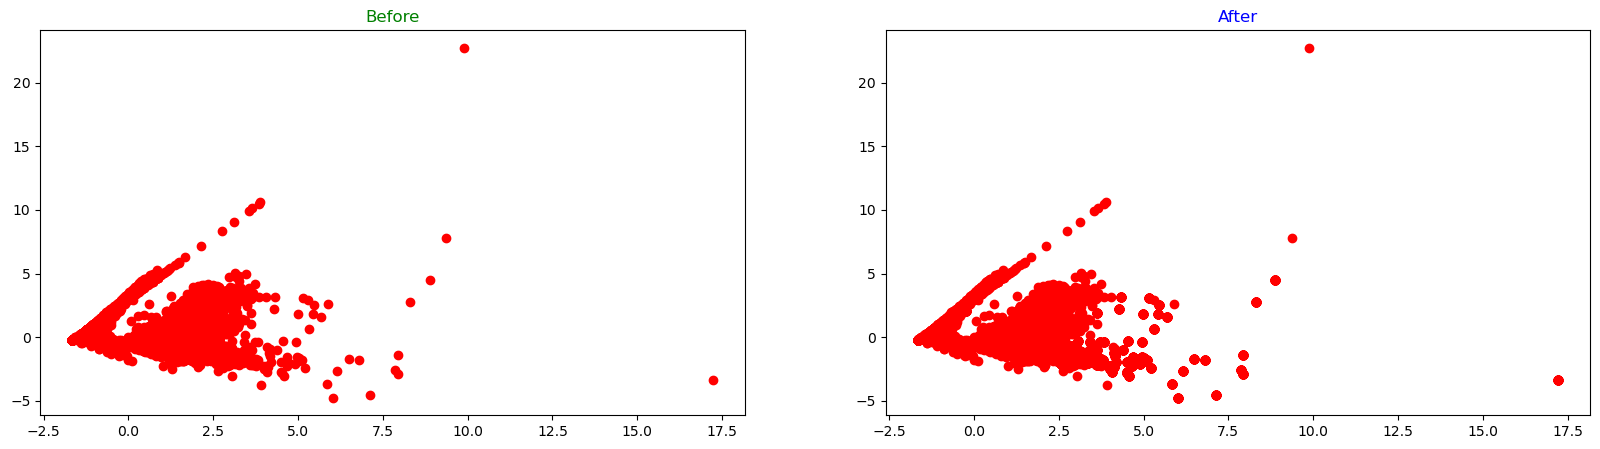

In [35]:
visualize(X_train, X_res, y_train, y_res, 0)

In [36]:
model_ros = train_and_evaluate(X_res, y_res, X_test, y_test)

training	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.97      0.93      0.95      0.95      0.90      8192
          1       0.97      0.93      0.97      0.95      0.95      0.89      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.90     16384

--------------------------------------------------------------------------------
      B     M
B  7926   266
M   593  7599

testing	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.97      0.71      0.98      0.83      0.70      2731
          1       0.35      0.71      0.97      0.47      0.83      0.67        65

avg / total       0.98      0.96      0.71      0.97   

In [37]:
# SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(k_neighbors=10, random_state=42)

In [40]:
X_res, y_res = resample(smote, X_train, y_train)

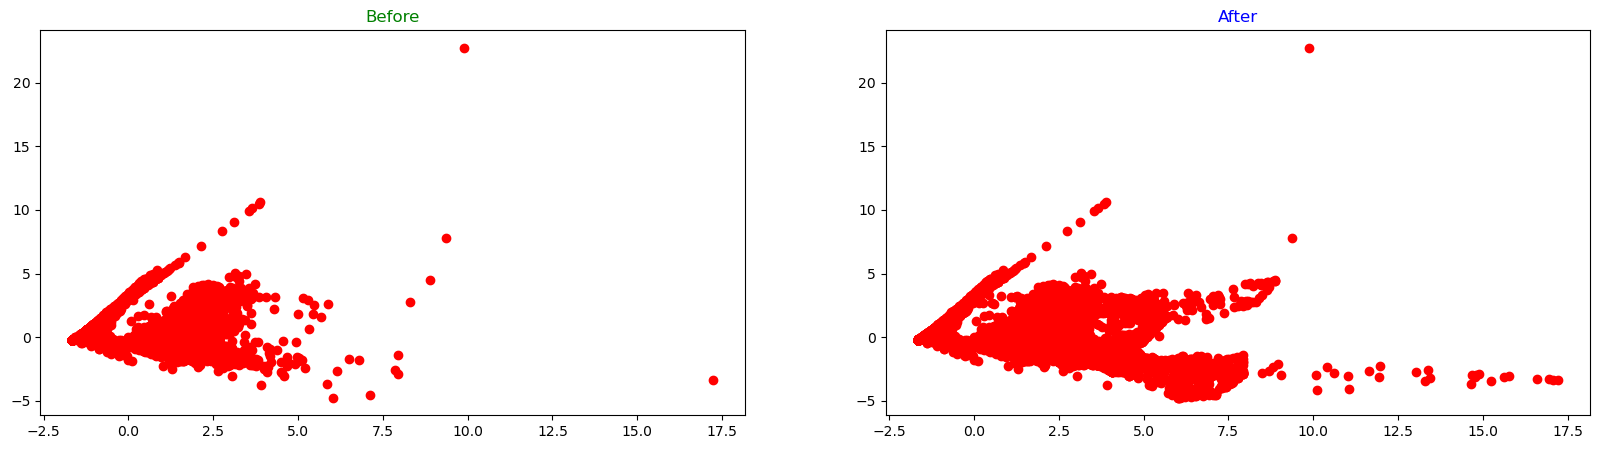

In [42]:
visualize(X_train, X_res, y_train, y_res, 0)

In [43]:
model_smote = train_and_evaluate(X_res, y_res, X_test, y_test)

training	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.96      0.95      0.95      0.95      0.91      8192
          1       0.96      0.95      0.96      0.95      0.95      0.91      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.91     16384

--------------------------------------------------------------------------------
      B     M
B  7865   327
M   444  7748

testing	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.95      0.74      0.97      0.84      0.72      2731
          1       0.27      0.74      0.95      0.40      0.84      0.69        65

avg / total       0.98      0.95      0.74      0.96   

In [44]:
# UnderSampling
# RandomUnderSampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler

In [46]:
rus = RandomUnderSampler()

In [47]:
X_res, y_res = resample(rus, X_train, y_train)

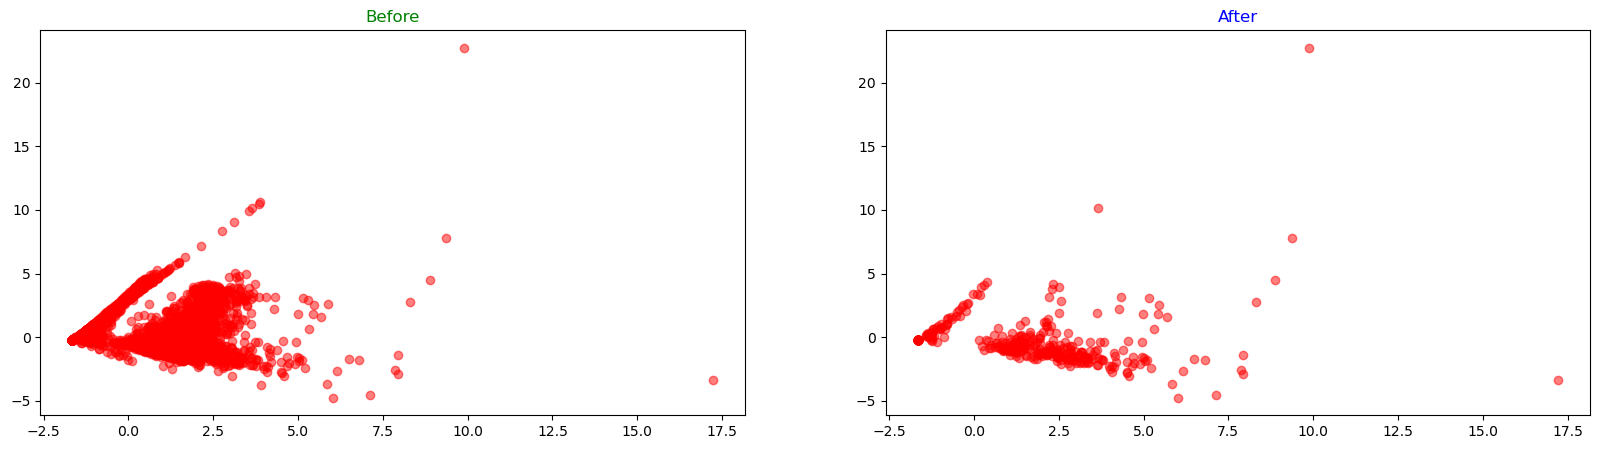

In [51]:
visualize(X_train, X_res, y_train, y_res)

In [52]:
model_rus = train_and_evaluate(X_res, y_res, X_test, y_test)

training	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.89      0.95      0.88      0.92      0.91      0.84       195
          1       0.95      0.88      0.95      0.91      0.91      0.83       195

avg / total       0.92      0.92      0.92      0.92      0.91      0.84       390

--------------------------------------------------------------------------------
     B    M
B  185   10
M   23  172

testing	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.87      0.83      0.93      0.85      0.72      2731
          1       0.13      0.83      0.87      0.22      0.85      0.72        65

avg / total       0.98      0.86      0.83      0.91      0.8

In [53]:
from imblearn.under_sampling import NearMiss

In [54]:
nm1 = NearMiss(version=1, n_neighbors=20)

In [55]:
X_res, y_res = resample(nm1, X_train, y_train)

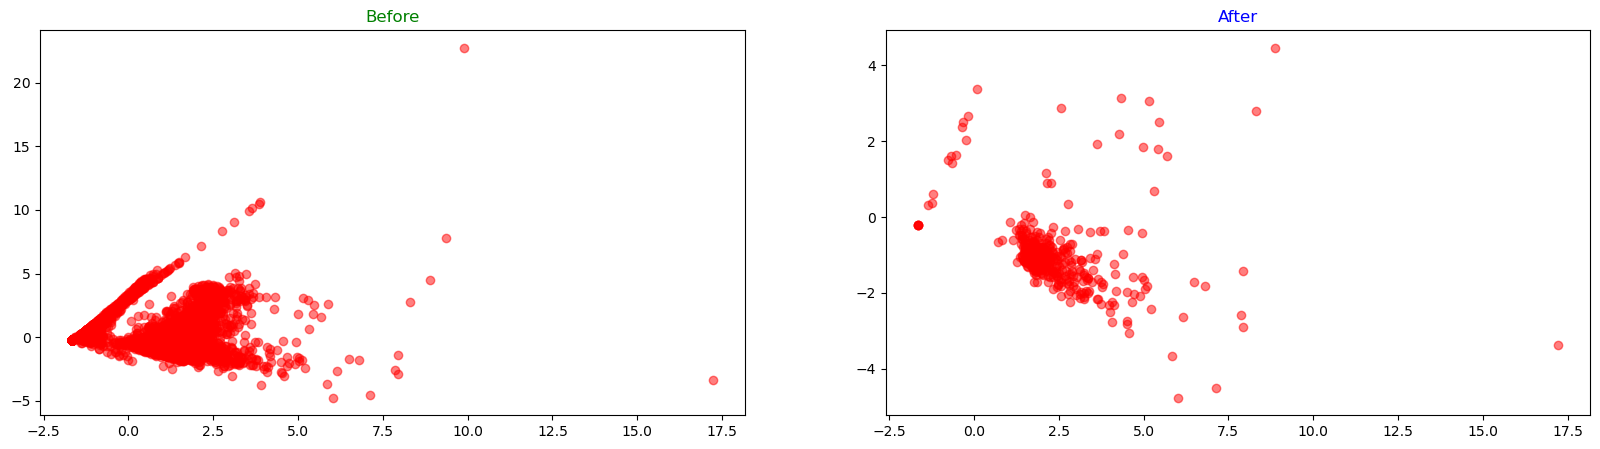

In [59]:
visualize(X_train, X_res, y_train, y_res)

In [60]:
model_nm1 = train_and_evaluate(X_res, y_res, X_test, y_test)

training	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.83      0.97      0.80      0.90      0.88      0.79       195
          1       0.97      0.80      0.97      0.88      0.88      0.77       195

avg / total       0.90      0.89      0.89      0.89      0.88      0.78       390

--------------------------------------------------------------------------------
     B    M
B  190    5
M   39  156

testing	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.13      0.69      0.23      0.30      0.08      2731
          1       0.02      0.69      0.13      0.04      0.30      0.09        65

avg / total       0.92      0.14      0.68      0.22      0.3

In [61]:
nm2 = NearMiss(version=2, n_neighbors=20)

In [62]:
X_res, y_res = resample(nm2, X_train, y_train)

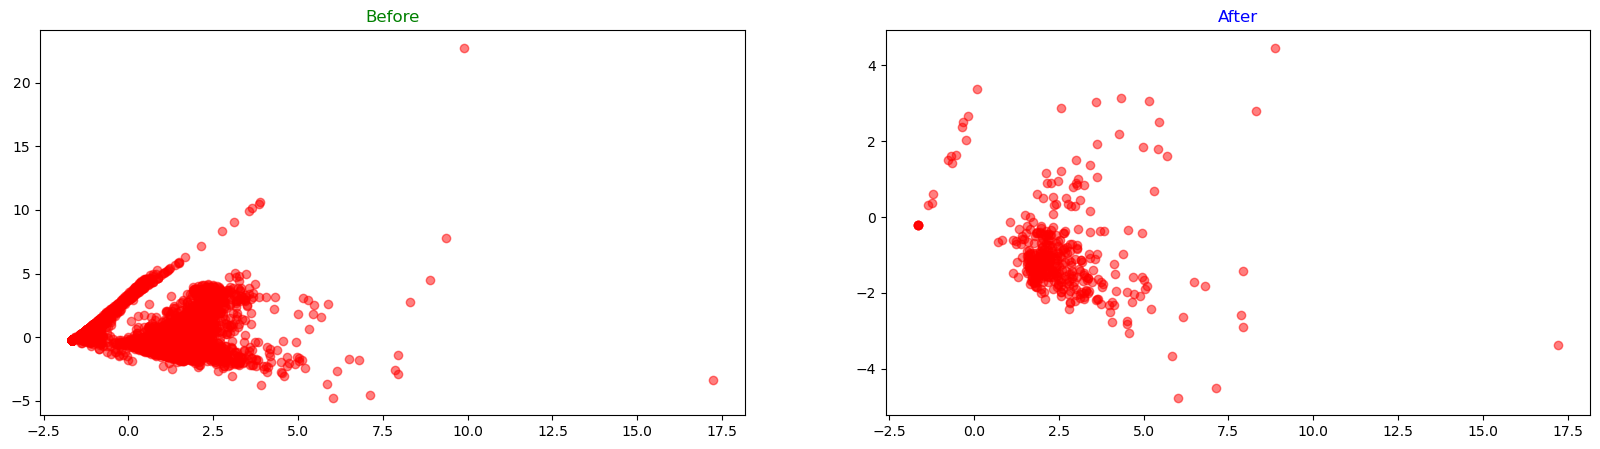

In [63]:
visualize(X_train, X_res, y_train, y_res)

In [64]:
model_nm2 = train_and_evaluate(X_res, y_res, X_test, y_test)

training	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.97      0.93      0.95      0.95      0.90       195
          1       0.97      0.93      0.97      0.95      0.95      0.90       195

avg / total       0.95      0.95      0.95      0.95      0.95      0.90       390

--------------------------------------------------------------------------------
     B    M
B  189    6
M   14  181

testing	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.03      0.89      0.07      0.17      0.03      2731
          1       0.02      0.89      0.03      0.04      0.17      0.03        65

avg / total       0.91      0.05      0.87      0.07      0.1

In [65]:
nm3 = NearMiss(version=3, n_neighbors=20)

In [66]:
X_res, y_res = resample(nm3, X_train, y_train)

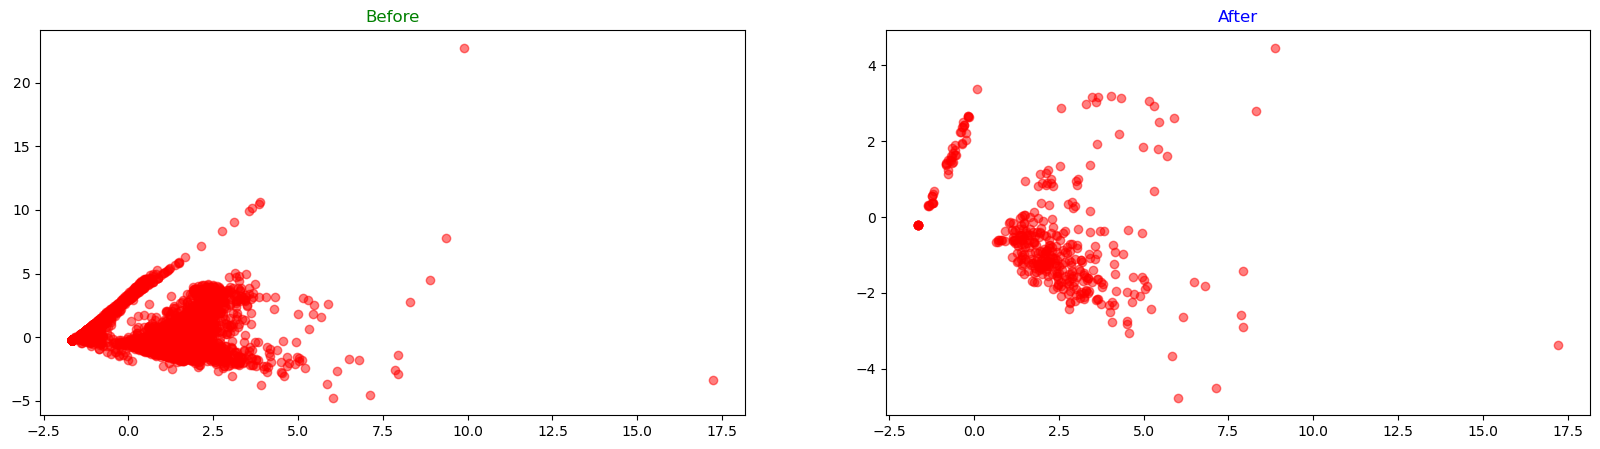

In [67]:
visualize(X_train, X_res, y_train, y_res)

In [68]:
model_nm3 = train_and_evaluate(X_res, y_res, X_test, y_test)

training	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.78      0.94      0.73      0.85      0.83      0.70       195
          1       0.92      0.73      0.94      0.81      0.83      0.67       195

avg / total       0.85      0.83      0.83      0.83      0.83      0.68       390

--------------------------------------------------------------------------------
     B    M
B  183   12
M   53  142

testing	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.98      0.59      0.62      0.74      0.60      0.36      2731
          1       0.03      0.62      0.59      0.07      0.60      0.36        65

avg / total       0.96      0.59      0.61      0.72      0.6

In [69]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [70]:
cnn = CondensedNearestNeighbour(random_state=0, n_neighbors=10, sampling_strategy='majority')

In [71]:
X_res, y_res = resample(cnn, X_train, y_train)

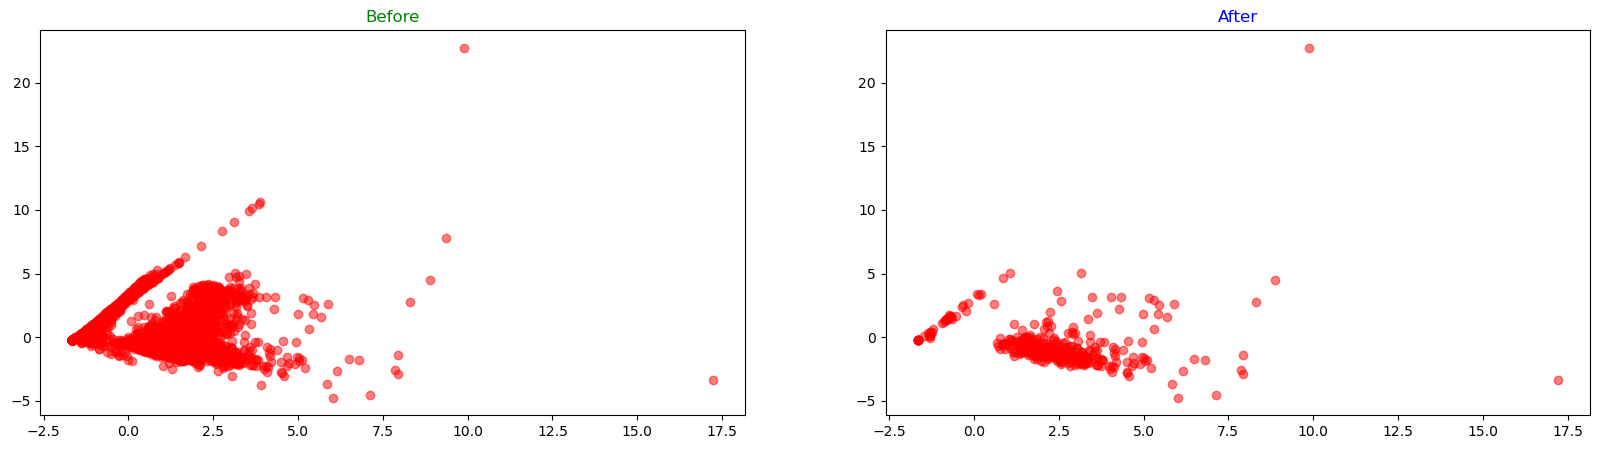

In [72]:
visualize(X_train, X_res, y_train, y_res)

In [73]:
model_cnn = train_and_evaluate(X_res, y_res, X_test, y_test)

training	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.83      0.79      0.84      0.81      0.82      0.66       192
          1       0.80      0.84      0.79      0.82      0.82      0.67       195

avg / total       0.82      0.82      0.82      0.82      0.82      0.67       387

--------------------------------------------------------------------------------
     B    M
B  152   40
M   31  164

testing	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.54      0.66      0.70      0.60      0.35      2731
          1       0.03      0.66      0.54      0.06      0.60      0.36        65

avg / total       0.96      0.54      0.66      0.68      0.6

In [74]:
from imblearn.combine import SMOTEENN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
smoteenn = SMOTEENN(random_state=42, sampling_strategy='auto')

In [77]:
X_res, y_res = resample(smoteenn, X_train, y_train)

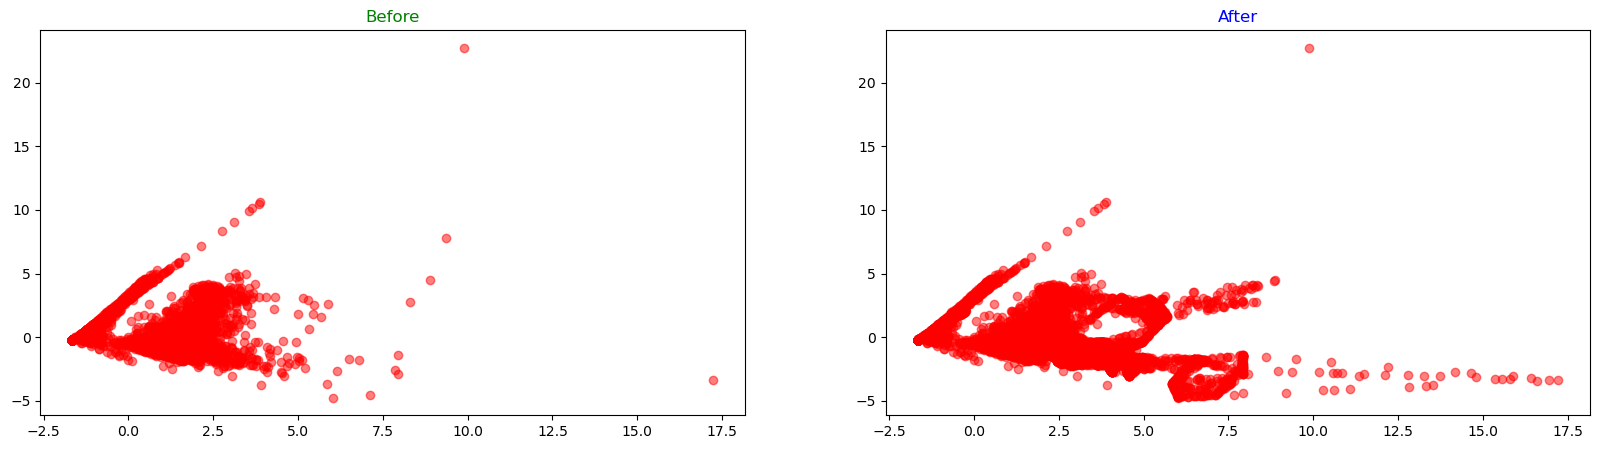

In [78]:
visualize(X_train, X_res, y_train, y_res)

In [79]:
model_smoteenn = train_and_evaluate(X_res, y_res, X_test, y_test)

training	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.98      0.98      0.98      0.98      0.98      0.96      7760
          1       0.98      0.98      0.98      0.98      0.98      0.96      7882

avg / total       0.98      0.98      0.98      0.98      0.98      0.96     15642

--------------------------------------------------------------------------------
      B     M
B  7634   126
M   159  7723

testing	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.96      0.75      0.97      0.85      0.74      2731
          1       0.29      0.75      0.96      0.42      0.85      0.71        65

avg / total       0.98      0.95      0.76      0.96   

In [80]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [81]:
model_ens = BalancedRandomForestClassifier(max_depth=6, random_state=42, max_samples=20)

In [82]:
model_ens.fit(X_train, y_train)

/home/natasa/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

BalancedRandomForestClassifier(max_depth=6, max_samples=20, random_state=42)

In [83]:
report(model_ens, X_train, y_train)

training	 | 	 BalancedRandomForestClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.90      0.87      0.95      0.88      0.78      8192
          1       0.17      0.87      0.90      0.29      0.88      0.78       195

avg / total       0.98      0.90      0.87      0.93      0.88      0.78      8387

--------------------------------------------------------------------------------
      B    M
B  7374  818
M    26  169


In [84]:
report(model_ens, X_test, y_test, 'testing')

testing	 | 	 BalancedRandomForestClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.91      0.83      0.95      0.87      0.76      2731
          1       0.17      0.83      0.91      0.29      0.87      0.75        65

avg / total       0.98      0.90      0.83      0.93      0.87      0.76      2796

--------------------------------------------------------------------------------
      B    M
B  2473  258
M    11   54


In [85]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [86]:
models = [model_dct, model_ros, model_smote, model_rus, model_nm1, model_nm2, model_nm3, model_cnn, model_smoteenn, model_ens]

In [87]:
model_names = ['DTC', 'ROS', 'SMOTE', 'RUS', 'NM1', 'NM2', 'NM3', 'CNN', 'SMOTEENN', 'Ensemble']

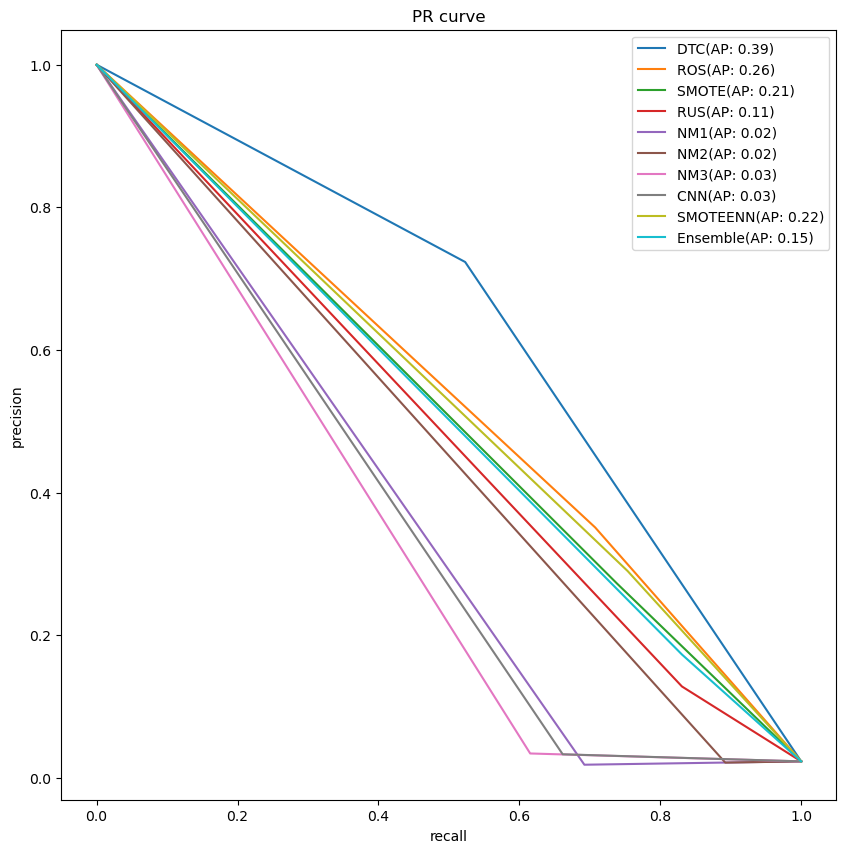

In [95]:
plt.figure(figsize=(10,10))

for model, model_name in zip(models, model_names):
    precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))
    ap = average_precision_score(y_test, model.predict(X_test))
    lab = model_name + "(AP: " + str(round(ap, 2)) + ")"
    plt.plot(recall, precision, label=lab)
    
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR curve')
plt.legend()
plt.show()

In [90]:
# ROC kriva

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

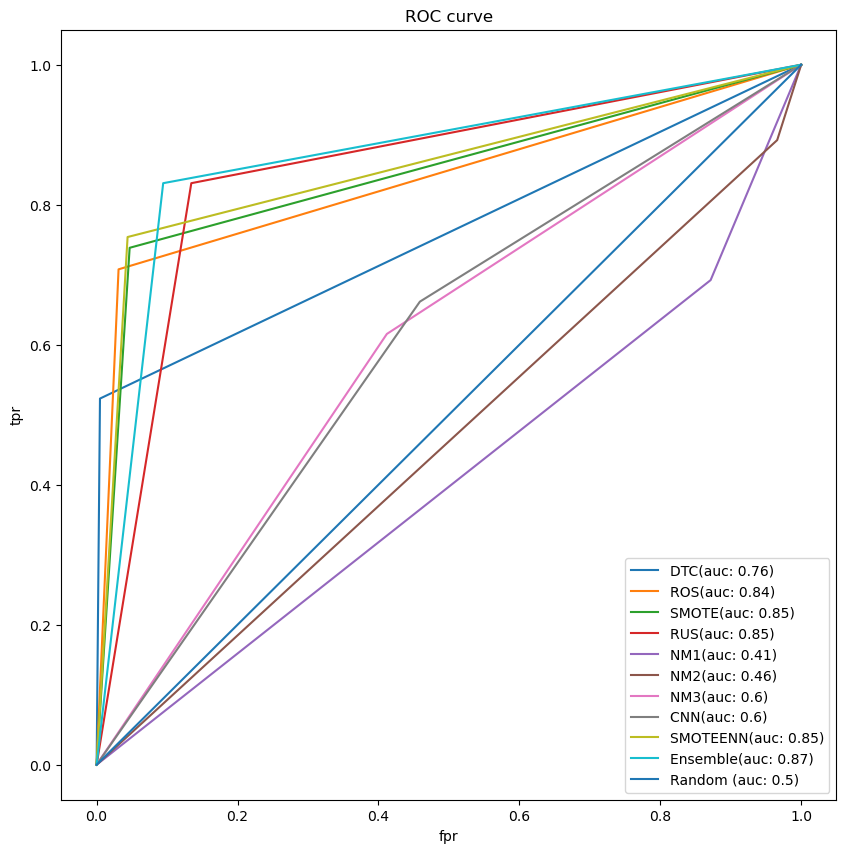

In [94]:
plt.figure(figsize=(10, 10))

for model, model_name in zip(models, model_names):
    fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
    auc = roc_auc_score(y_test, model.predict(X_test))
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)
    
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1], [0,1], label='Random (auc: 0.5)')
plt.legend()
plt.title("ROC curve")
plt.show()